In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
housing_data = pd.read_csv('/content/gdrive/My Drive/Google Research/Learning/Kaggle Projects/Brooklyn Home Sales 2003-2017/brooklyn_sales_map.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40,41,43,45,46,47,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
housing_data['sale_price'].describe().apply(lambda x: format(x, 'f'))


count       390883.000000
mean        506754.477693
std        2353964.664220
min              0.000000
25%              0.000000
50%         275000.000000
75%         593000.000000
max      499401179.000000
Name: sale_price, dtype: object

In [0]:
#highest selling property
housing_data.sort_values('sale_price').tail(1)


,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


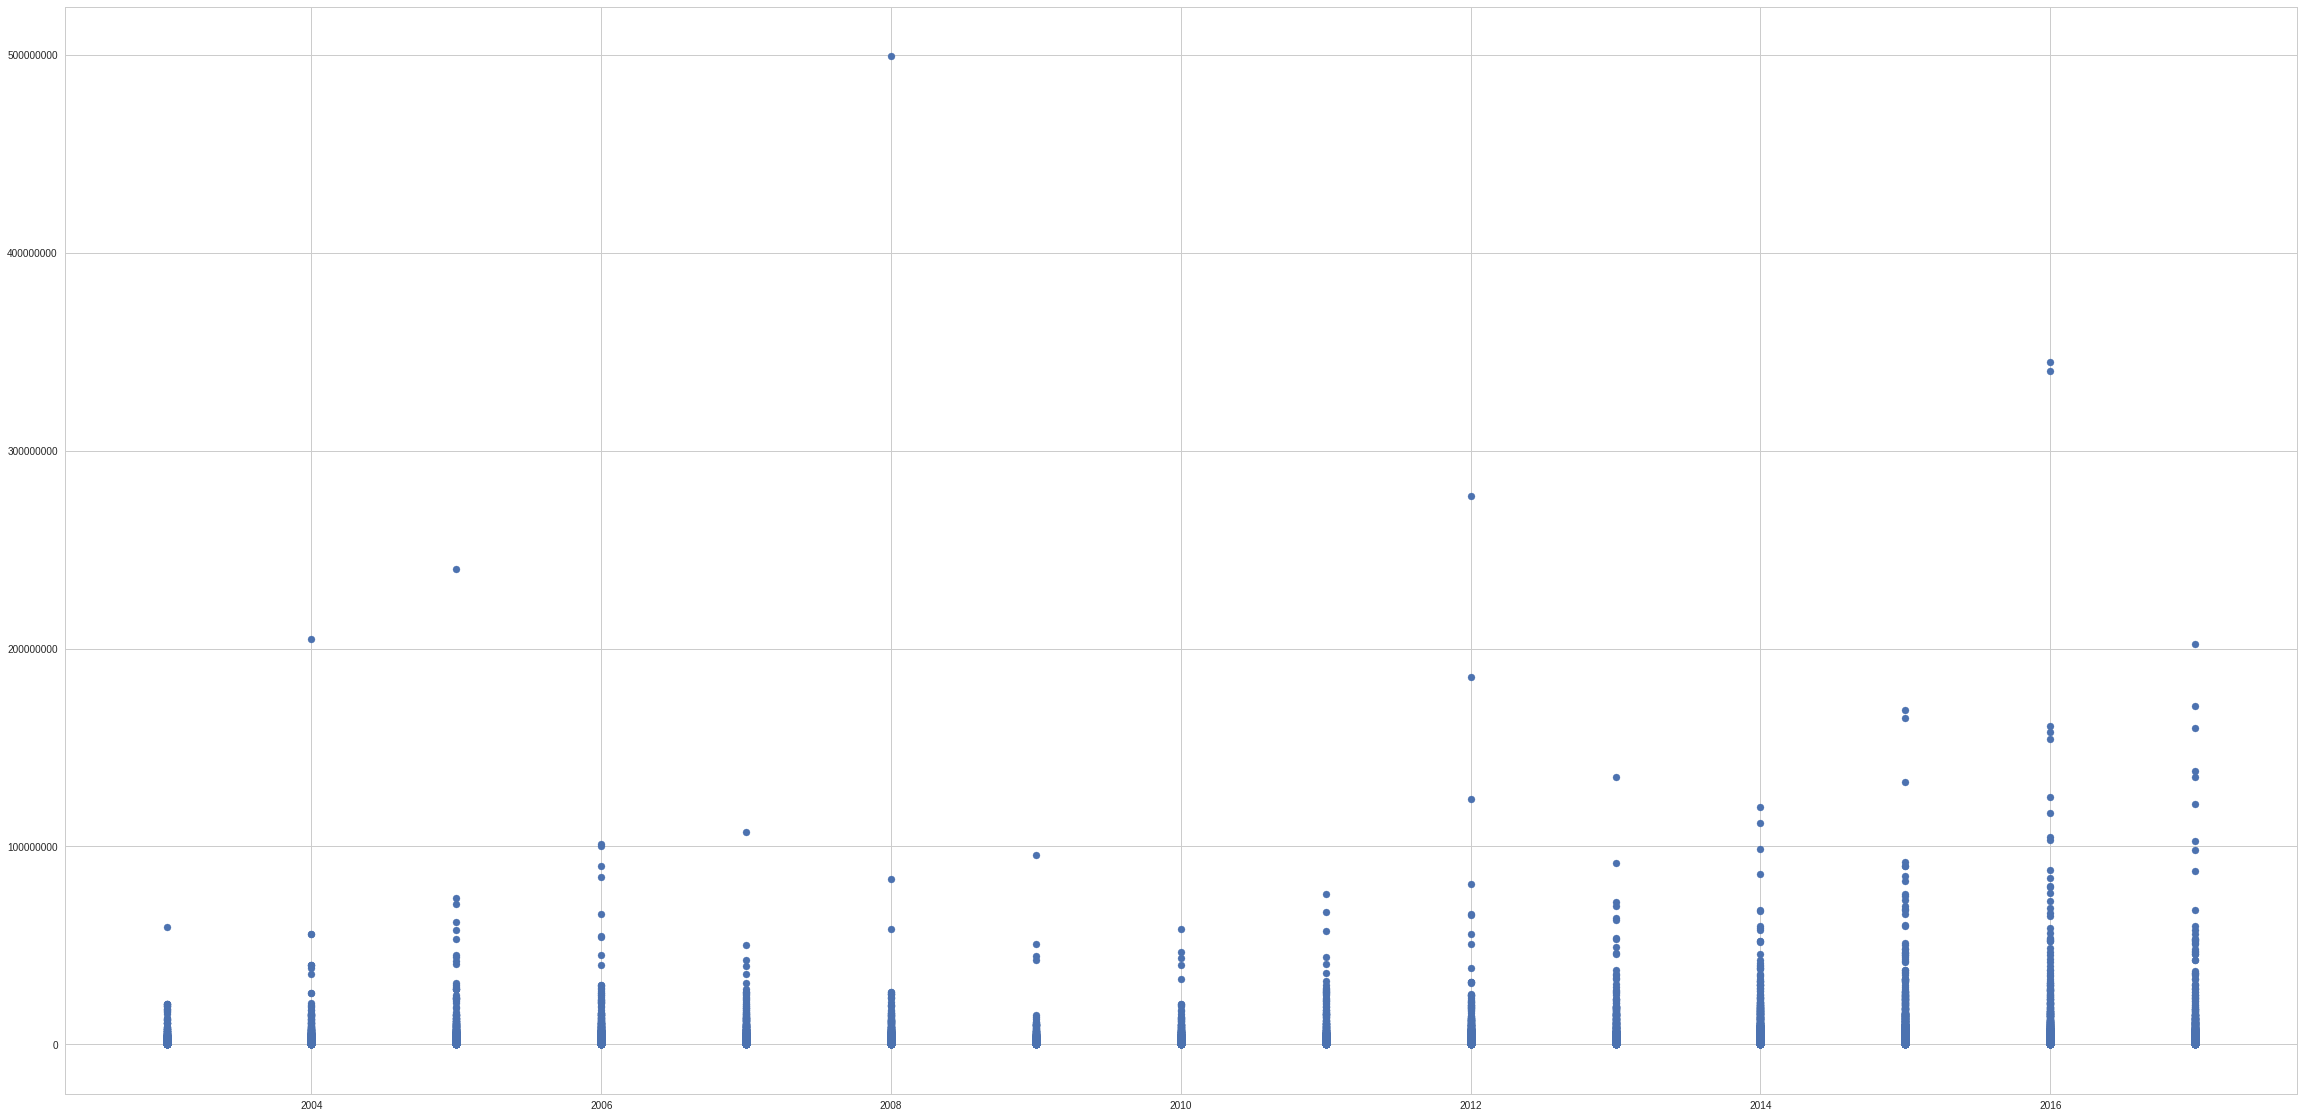

In [0]:
#housing prices by year
plt.scatter(x=housing_data['year_of_sale'],y=housing_data['sale_price'])
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()

In [0]:
#removing 0 price houses
housing_data = housing_data[housing_data.sale_price > 0]

In [0]:
housing_data['sale_price'].describe()
bins=[-100000000,20000,40000,60000,80000,100000,1000000,10000000,500000000]
choices =['$0-$200k','$200k-$400k','$400k-$600k','$600k-$800k','$800k-$1mlln','$1mlln-$10mlln','$10mlln-$100mlln','$100mlln-$500mlln']
housing_data['price_range']=pd.cut(housing_data['sale_price'],bins=bins,labels=choices)

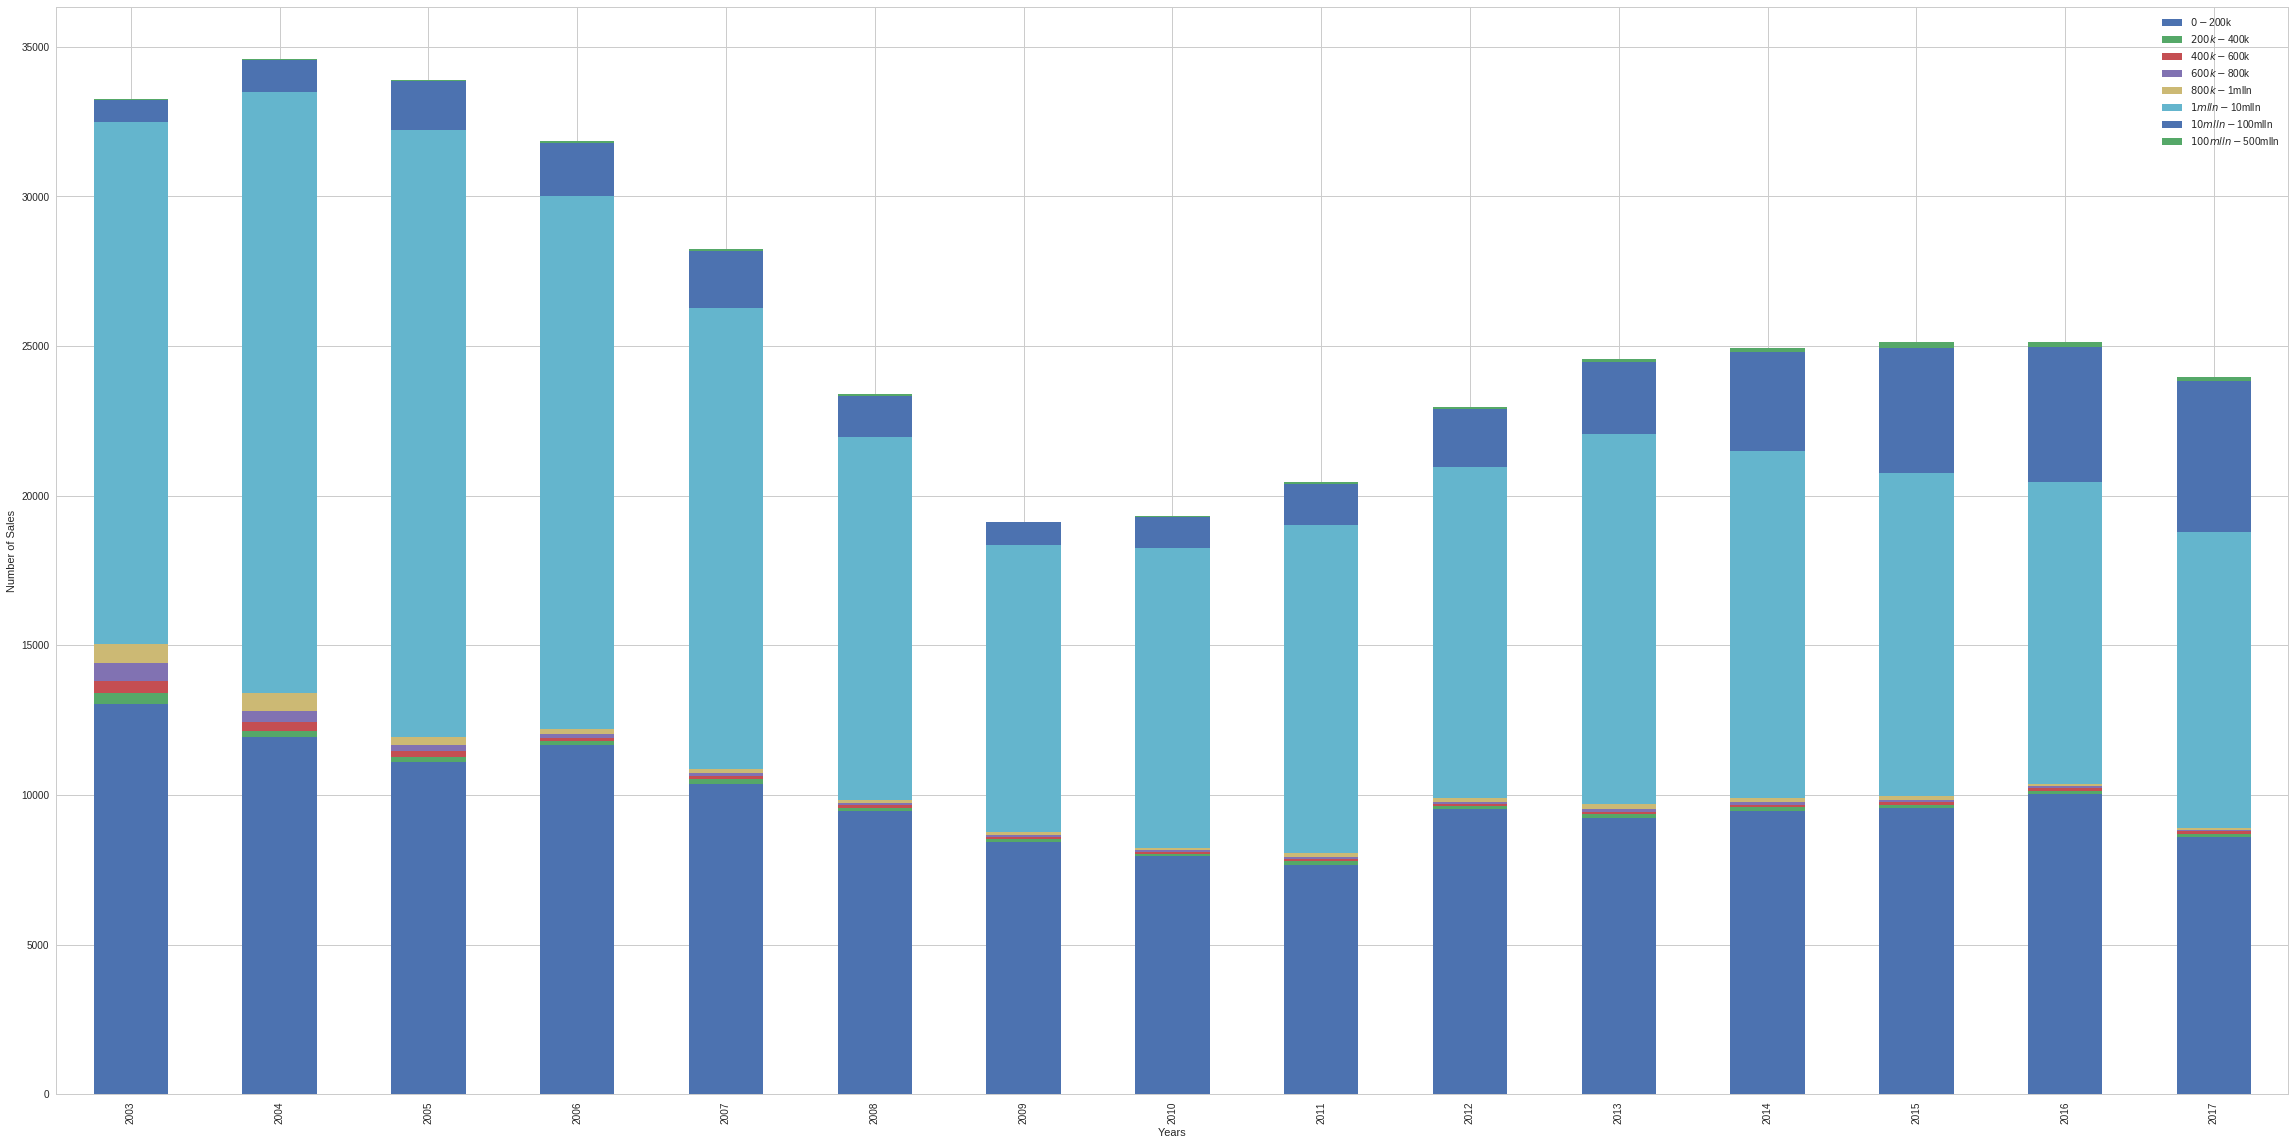

In [0]:
ax = housing_data.groupby(['year_of_sale','price_range']).size().unstack().plot.bar(stacked=True)
horiz_offset = 1
vert_offset = 1
ax.set_xlabel('Years')
ax.set_ylabel('Number of Sales')
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

In [0]:
def conv(year):
  return housing_data[housing_data['year_of_sale']==year].groupby('price_range').size()
perc_total = [x/sum(x)*100 for x in [conv(2003),conv(2004),conv(2005),conv(2006),conv(2007),conv(2008),conv(2009),conv(2010),conv(2011),conv(2012),conv(2013),conv(2014),conv(2015),conv(2016),conv(2017)]]
year_names = list(range(2003,2018))
housing_df = pd.DataFrame(perc_total, index= year_names)

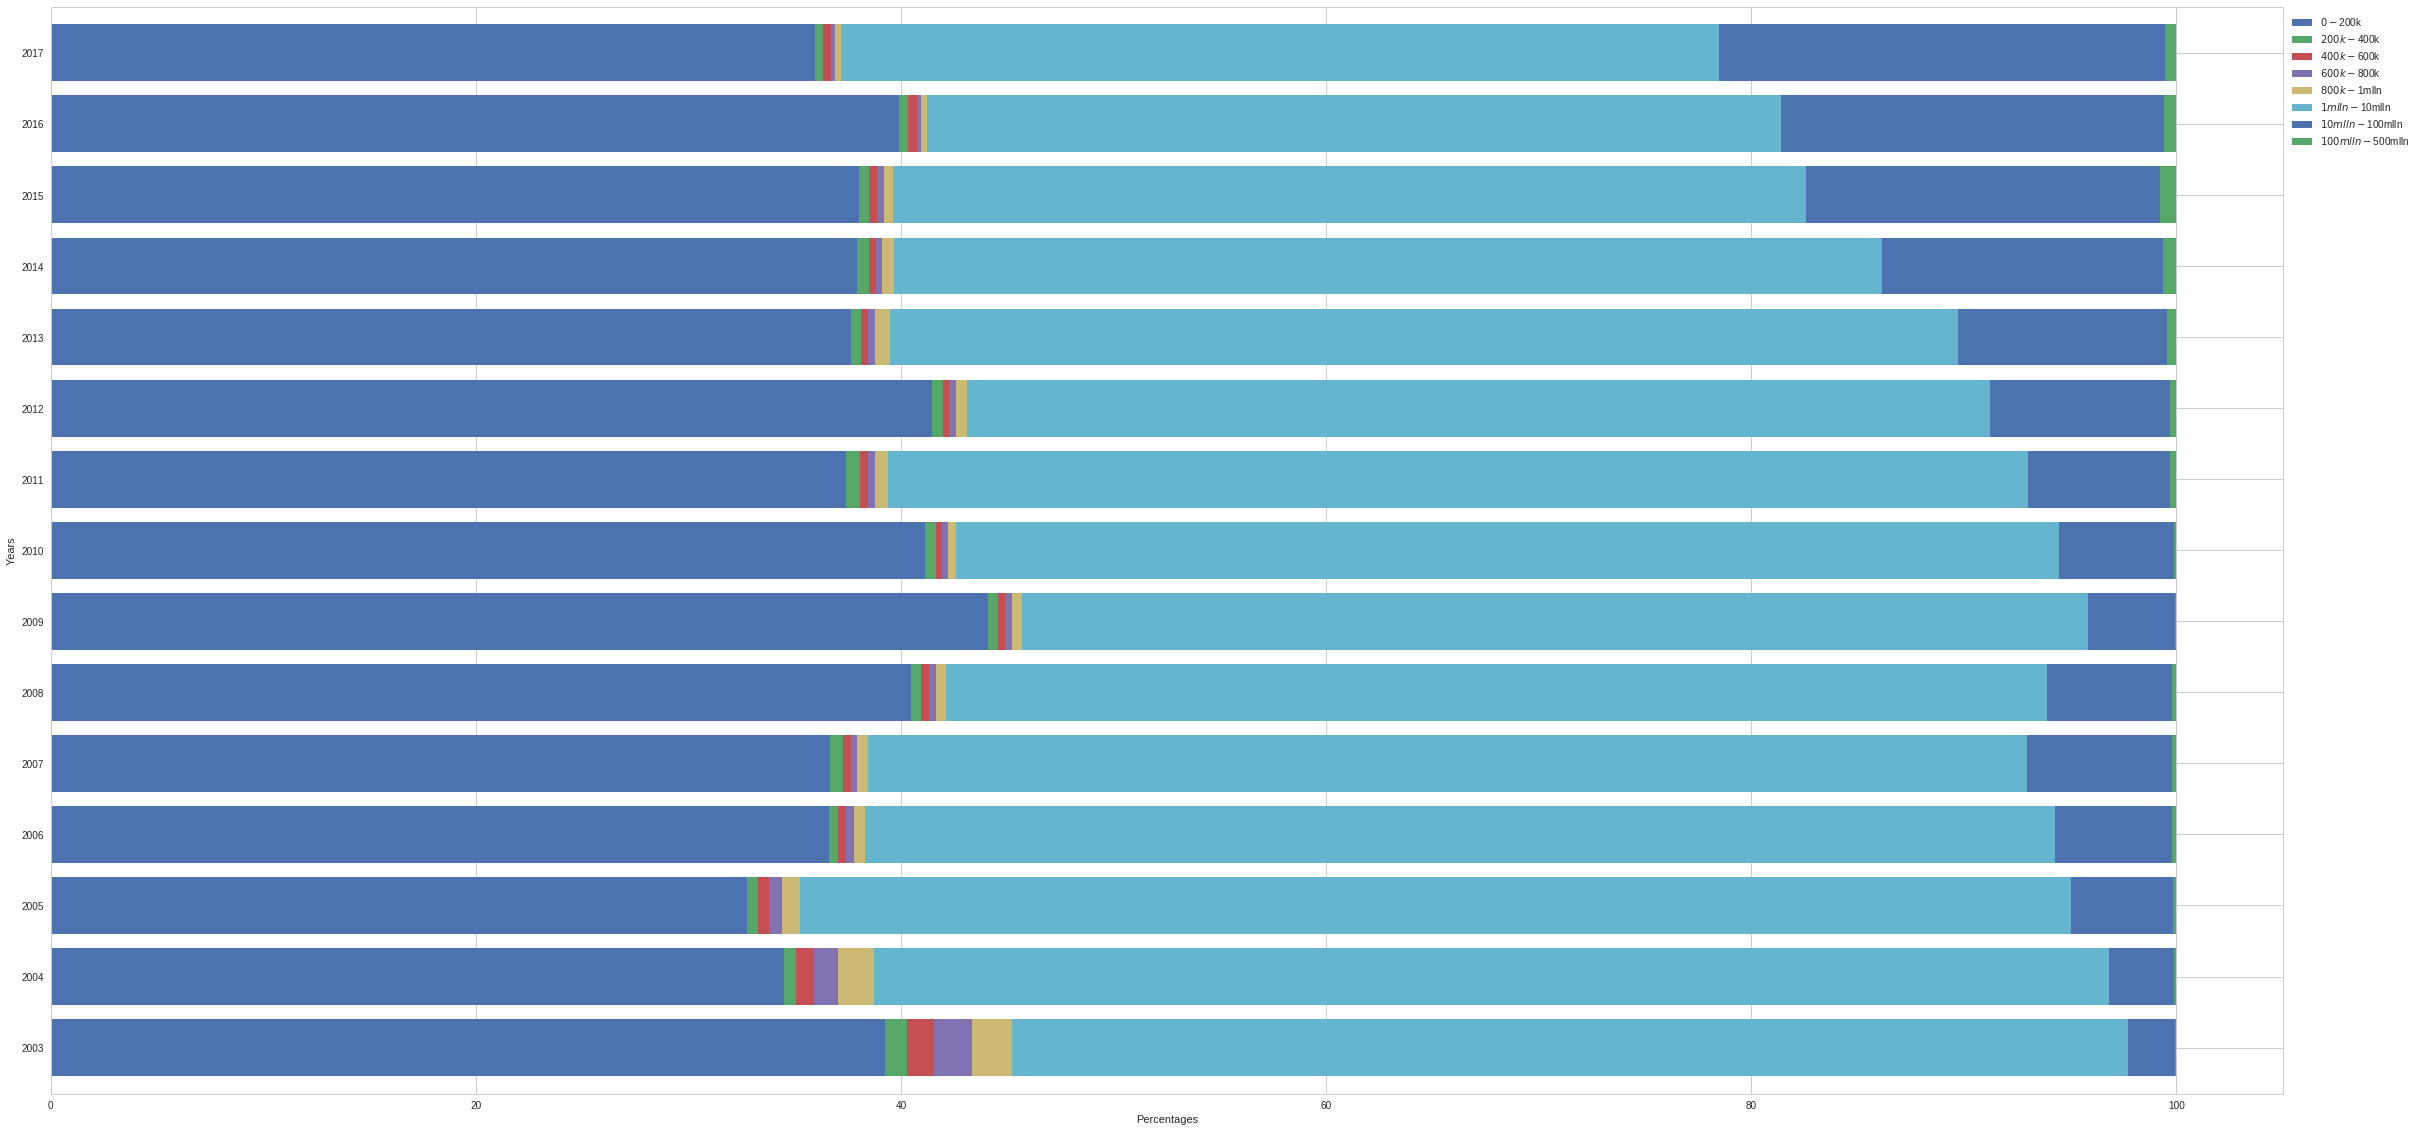

In [0]:
ax_two = housing_df.plot(kind='barh', stacked=True, width=0.80)
horiz_offset = 1
vert_offset = 1
ax_two.set_xlabel('Percentages')
ax_two.set_ylabel('Years')
ax_two.legend(bbox_to_anchor=(horiz_offset, vert_offset))


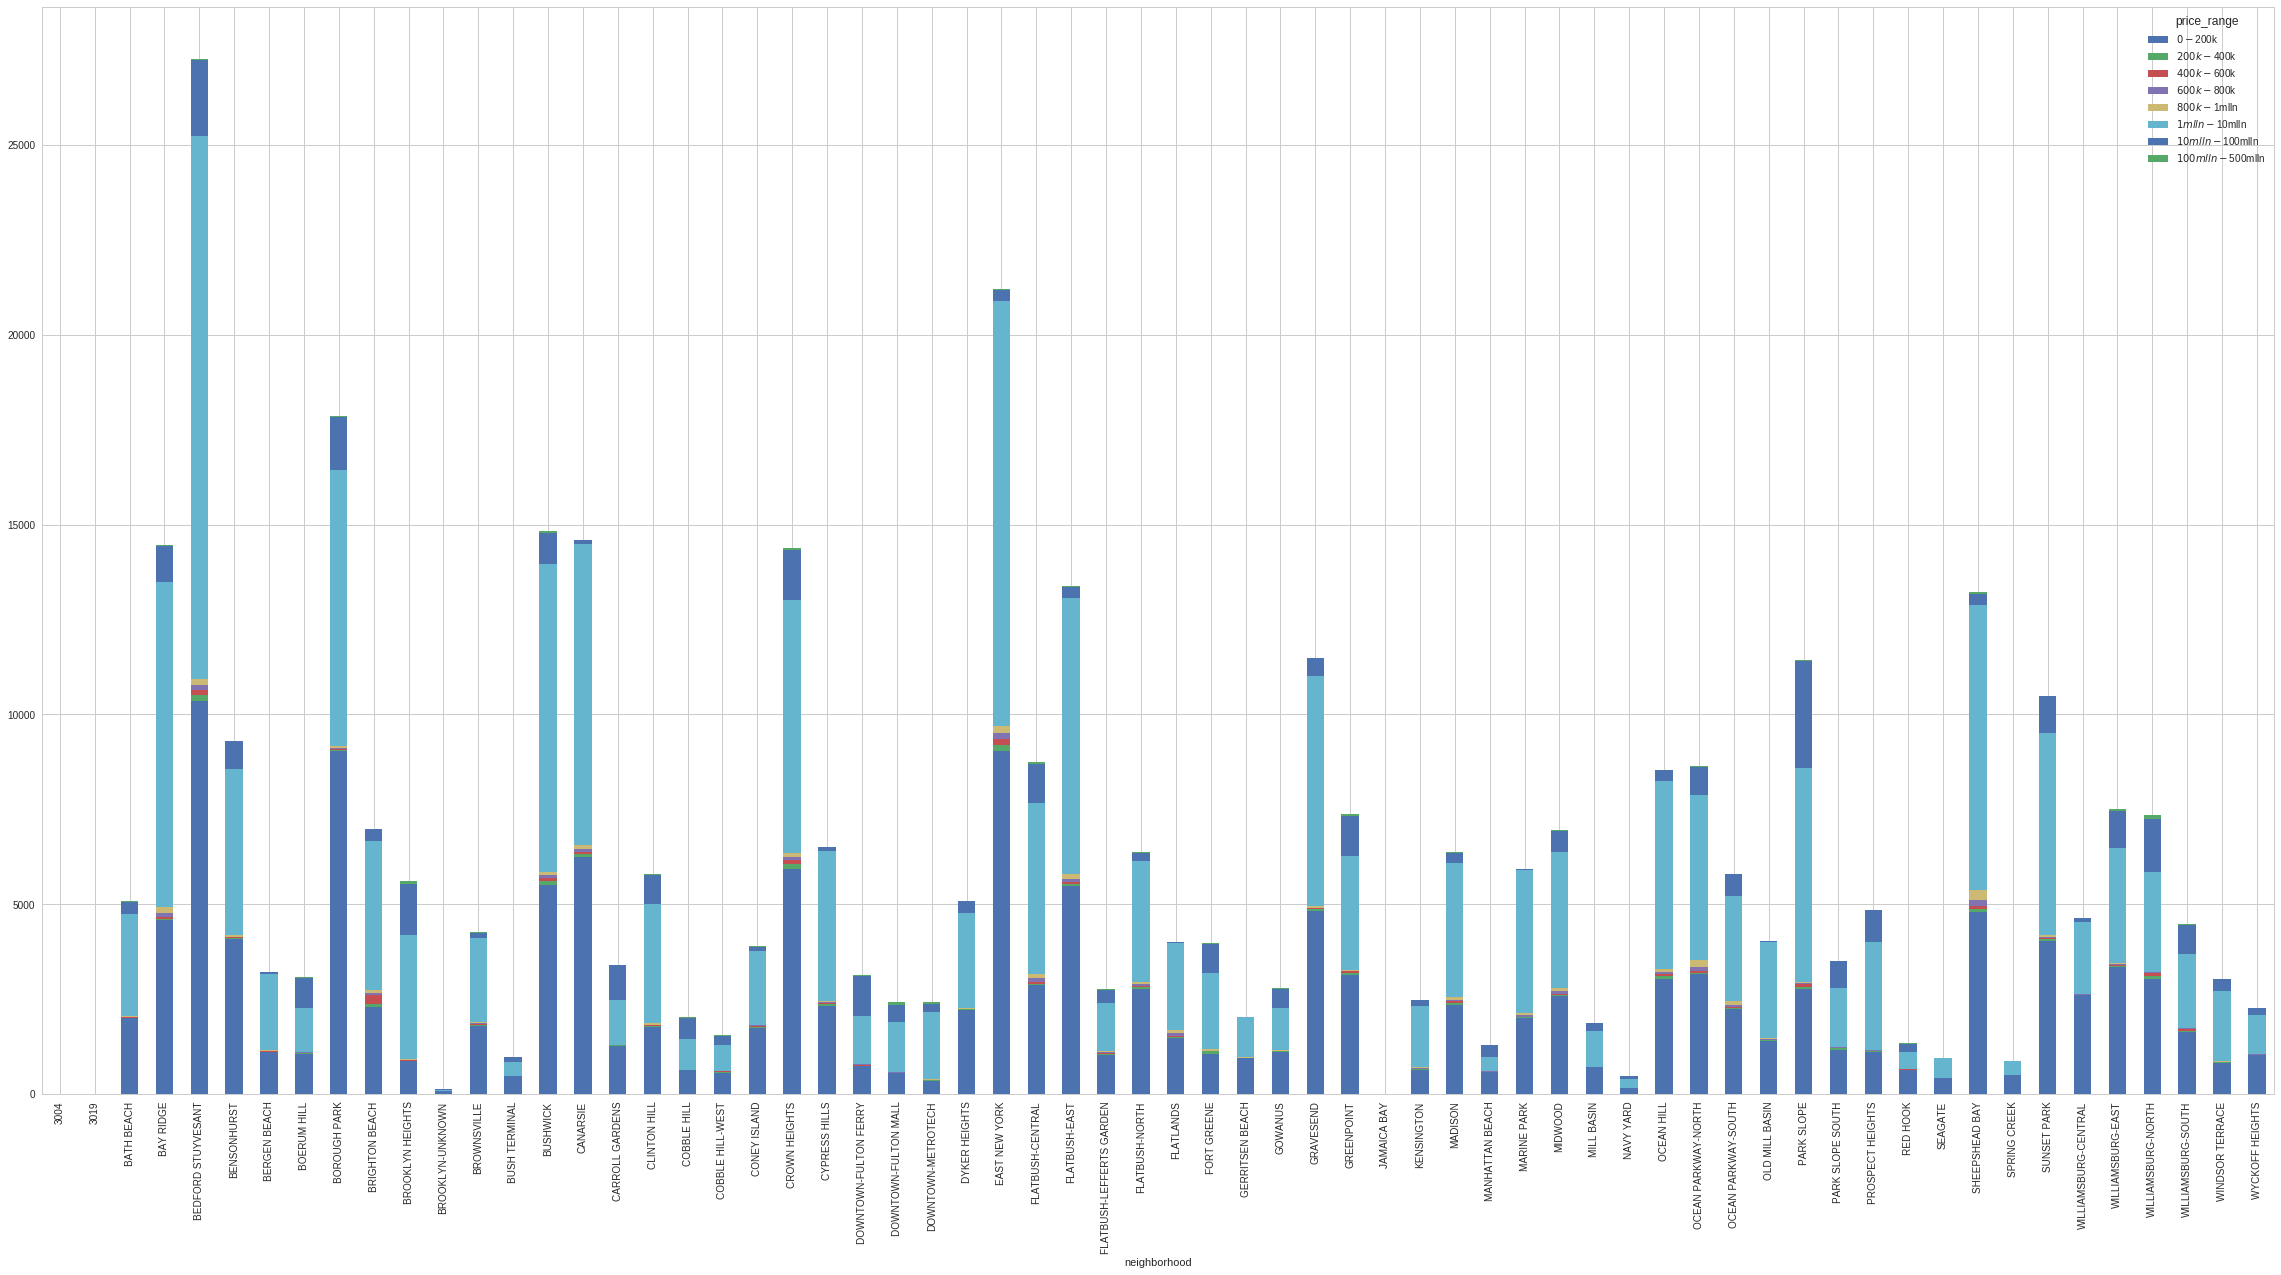

In [0]:
housing_data.groupby(['neighborhood','price_range']).size().unstack().plot.bar(stacked=True)
horiz_offset = 1
vert_offset = 1
plt.rcParams["figure.figsize"] = [40,20]


In [0]:
#removing outliers
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)
  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df
housing_data = remove_outlier(housing_data,"sale_price")

In [0]:
#removing columns with too many NA values (>75%)
threshold = len(housing_data) * .75
housing_data.dropna(thresh = threshold, axis = 1, inplace = True)

In [0]:
#drop redundant columns/columns with little to no useful information
housing_data = housing_data.drop(['APPBBL','BoroCode','Borough','BBL','price_range','PLUTOMapID','YearBuilt',
                                  'CondoNo','BuiltFAR','FireComp','MAPPLUTO_F','Sanborn',
                                  'SanitBoro','Unnamed: 0','Version',
                                  'block','borough','Address','OwnerName','zip_code'],axis=1)

In [0]:
#if basement data is missing it might be safer to assume that whether or not the apartment/building is unknown which is represented by the number 5
housing_data['BsmtCode'] = housing_data['BsmtCode'].fillna(5)
#Community Area- not applicable or available if Na
housing_data[['ComArea','CommFAR','FacilFAR','FactryArea','RetailArea','ProxCode','YearAlter1','YearAlter2']] = housing_data[['ComArea','CommFAR','FacilFAR','FactryArea','RetailArea','ProxCode','YearAlter1','YearAlter2']].fillna(0)
housing_data[['XCoord','YCoord','ZipCode','LotType','SanitDistr','HealthArea','HealthCent','PolicePrct','SchoolDist','tax_class_at_sale','CD','Council']] = housing_data[['XCoord','YCoord','ZipCode','LotType','SanitDistr','HealthArea','HealthCent','PolicePrct','SchoolDist','tax_class_at_sale','CD','Council']].apply(lambda x: x.fillna(x.mode()[0]))

In [0]:
#imputating NA values with Softimpute
from fancyimpute import SoftImpute
feature_arr = housing_data.drop(['OfficeArea','commercial_units',
                                 'residential_units','ResArea'],axis=1).select_dtypes(include=[np.number])
softimpute = SoftImpute()
housing_data2 = pd.DataFrame(softimpute.fit_transform(feature_arr.values),columns=feature_arr.columns,index=feature_arr.index)

In [0]:
housing_data = housing_data.fillna(housing_data2)

In [0]:
#data processing-replacing Na values with median for numbers and mode for non-numericals
#problem is it wouldn't make sense to fill median or mode for some columns
housing_data = housing_data.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'iufc' else x.fillna(x.mode()[0]))

In [0]:
housing_data['Age of House at Sale'] = housing_data['year_of_sale'] - housing_data['year_built']

In [0]:
housing_data = housing_data.drop(['year_of_sale','year_built','ZipCode'],axis=1)

In [0]:
#change strings to ints to preprocess for ML algos
def strnums(cols):
  return dict(zip(set(housing_data[cols]),list(range(0,len(set(housing_data[cols]))))))
for columns in set(housing_data.select_dtypes(exclude='number')):
  housing_data[columns] = housing_data[columns].map(strnums(columns))

In [0]:
#baseline model
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
features = list(housing_data.drop(['sale_price'],axis=1)) #list(housing_data[pruned_features]) 
y = housing_data.sale_price
X = housing_data[features]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
dummy_median = DummyRegressor(strategy='mean')
dummy_regressor = dummy_median.fit(X_train,y_train)
dummy_predicts = dummy_regressor.predict(X_test)
print("Model Accuracy:", dummy_regressor.score(X_test,y_test)*100)

Model Accuracy: -0.00019362576233472595


In [0]:
print('$',mean_absolute_error(y_test,dummy_predicts))

$ 244809.01786117873


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
models = [RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=20,random_state=100),DecisionTreeRegressor(criterion='mse',max_depth=11,random_state=100),GradientBoostingRegressor(criterion='mse',n_estimators=200,max_depth=11)]

learning_mods = pd.DataFrame()
temp = {}

In [0]:
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(X_train, y_train)
    temp['R2_Price'] = r2_score(y_test, model.predict(X_test))
    print('score on training',model.score(X_train, y_train))
    print('r2 score',r2_score(y_test, model.predict(X_test)))
    learning_mods = learning_mods.append([temp])
learning_mods.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
learning_mods.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

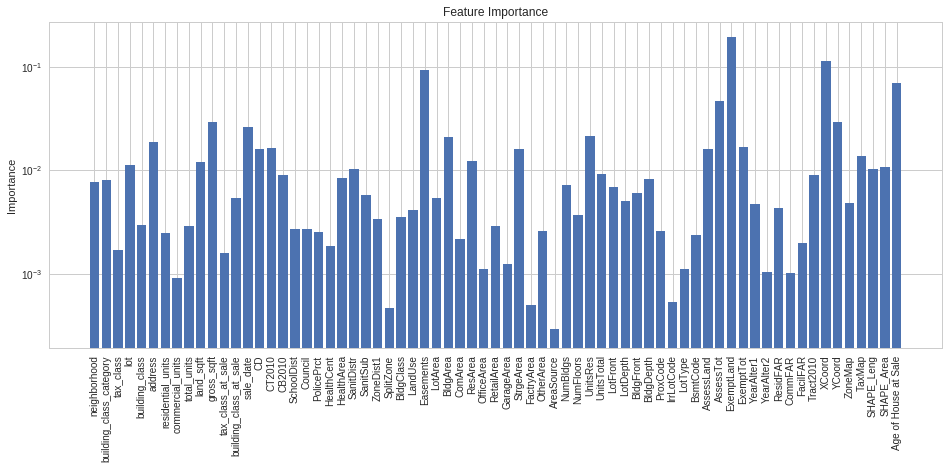

In [0]:
#check which features are more important
regressionTree_imp = model.feature_importances_
plt.figure(figsize=(16,6))
plt.yscale('log',nonposy='clip')
plt.bar(range(len(regressionTree_imp)),regressionTree_imp,align='center')
plt.xticks(range(len(regressionTree_imp)),features,rotation='vertical')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()

In [0]:
#visualise regression tree
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model, out_file=None, feature_names=features, filled=True, rotate=True)
graphviz.Source(dot_data,format='pdf')
